#### **1. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy**

In [16]:
import numpy as np 
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report 

In [27]:
# DecisionTreeClassifier()
# BaggingClassifier()
X, y = load_wine(return_X_y = True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 1)
print(f"X_train {X_train.shape} \n X_test : {X_test.shape} \ny_train : {y_train.shape}\ny_test : {y_test.shape}")

X_train (133, 13) 
 X_test : (45, 13) 
y_train : (133,)
y_test : (45,)


In [37]:
clf_01 = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=10,random_state=1).fit(X_train,y_train)
clf_01

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=1)

In [41]:
print(f"Report :\n {classification_report(y_test,clf_01.predict(X_test))}")

Report :
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.94      0.97        17
           2       1.00      1.00      1.00        10

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



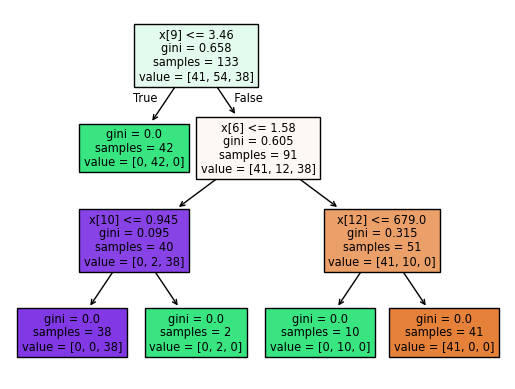

In [57]:
clf_01_ = DecisionTreeClassifier().fit(X_train,y_train)
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(clf_01_,filled=True)
plt.show()

#### **2. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)**

In [77]:
import numpy as np 
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [79]:
# DecisionTreeClassifier()
# BaggingClassifier()
X, y = load_wine(return_X_y = True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 1)
print(f"X_train {X_train.shape} \n X_test : {X_test.shape} \ny_train : {y_train.shape}\ny_test : {y_test.shape}")

X_train (133, 13) 
 X_test : (45, 13) 
y_train : (133,)
y_test : (45,)


In [ ]:
# DecisionTreeClassifier()
# BaggingClassifier()
X, y = load_wine(return_X_y = True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 1)
print(f"X_train {X_train.shape} \n X_test : {X_test.shape} \ny_train : {y_train.shape}\ny_test : {y_test.shape}")

In [87]:
reg_01 = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42).fit(X_train,y_train)
print(f" R2 Score : {r2_score(y_test,reg_01.predict(X_test))}")
reg_01

 R2 Score : 0.9315217391304348


BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42)

#### **3.  Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores**

In [48]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [128]:
data_03 = pd.DataFrame(load_breast_cancer().data, columns= load_breast_cancer().feature_names)
data_03["target"] = load_breast_cancer().target
# data_03.head(2)

In [103]:
X,y = data_03.drop("target",axis = 1), data_03.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 1)
print(f"X_train {X_train.shape} \n X_test : {X_test.shape} \ny_train : {y_train.shape}\ny_test : {y_test.shape}")

X_train (426, 30) 
 X_test : (143, 30) 
y_train : (426,)
y_test : (143,)


In [122]:
clf_03 = RandomForestClassifier(n_estimators=4).fit(X_train,y_train)
clf_03

RandomForestClassifier(n_estimators=4)

In [124]:
 fi = list(clf_03.feature_importances_)
features = X_train.columns
for i, f in enumerate(fi):
    print(f"{features[i]} : {round(f,4)}")

mean radius : 0.0
mean texture : 0.0178
mean perimeter : 0.0069
mean area : 0.1524
mean smoothness : 0.0
mean compactness : 0.0314
mean concavity : 0.0618
mean concave points : 0.0054
mean symmetry : 0.0091
mean fractal dimension : 0.0
radius error : 0.0235
texture error : 0.0
perimeter error : 0.0001
area error : 0.0138
smoothness error : 0.0
compactness error : 0.0039
concavity error : 0.0025
concave points error : 0.0131
symmetry error : 0.0
fractal dimension error : 0.0
worst radius : 0.1764
worst texture : 0.0268
worst perimeter : 0.232
worst area : 0.1819
worst smoothness : 0.0042
worst compactness : 0.0084
worst concavity : 0.0234
worst concave points : 0.003
worst symmetry : 0.0024
worst fractal dimension : 0.0


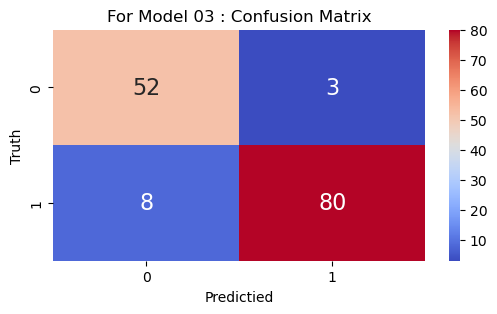

In [130]:
cm_03 = confusion_matrix(y_test,clf_03.predict(X_test))
plt.figure(figsize = (6,3))
# sns.heatmap(cm_03, annot = True)
sns.heatmap(cm_03, annot=True, cmap=sns.color_palette("coolwarm", as_cmap=True), fmt='d', cbar=True, annot_kws={"size": 16})
plt.title("For Model 03 : Confusion Matrix")
plt.xlabel("Predictied")
plt.ylabel("Truth")
plt.show()

#### **4. Train a Random Forest Regressor and compare its performance with a single Decision Tree**

In [45]:
# 1. Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load the dataset
data = fetch_california_housing()
X = data.data
y = data.target

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_pred = rf_regressor.predict(X_test)

# 5. Train a single Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
dt_pred = dt_regressor.predict(X_test)

# 6. Compare performance using Mean Squared Error (MSE) and R2 Score
# Random Forest performance
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Decision Tree performance
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

print("Random Forest Regressor Performance:")
print(f"Mean Squared Error: {rf_mse:.4f}")
print(f"R2 Score: {rf_r2:.4f}\n")

print("Decision Tree Regressor Performance:")
print(f"Mean Squared Error: {dt_mse:.4f}")
print(f"R2 Score: {dt_r2:.4f}")

Random Forest Regressor Performance:
Mean Squared Error: 0.2554
R2 Score: 0.8051

Decision Tree Regressor Performance:
Mean Squared Error: 0.4952
R2 Score: 0.6221


#### **5. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier**

In [11]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [25]:
X, y = load_wine(return_X_y = True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 1)
print(f"X_train {X_train.shape} \nX_test : {X_test.shape} \ny_train : {y_train.shape}\ny_test : {y_test.shape}")

X_train (133, 13) 
X_test : (45, 13) 
y_train : (133,)
y_test : (45,)


In [23]:
clf_04_part_01 = RandomForestClassifier(n_estimators = 1)
clf_04_part_02 = RandomForestClassifier(n_estimators = 100)
clf_04_part_01.fit(X_train,y_train)
clf_04_part_02.fit(X_train,y_train)
print(f"Accuracy Tree only one : {accuracy_score(y_test,clf_04_part_01.predict(X_test))}")
print(f"Accuracy 100 Tree {accuracy_score(y_test,clf_04_part_02.predict(X_test))}")

Accuracy Tree only one : 0.9333333333333333
Accuracy 100 Tree 0.9777777777777777


In [60]:
print(f"Out of Bag Score : {clf_04_part_01.oob_score}")

Out of Bag Score : False


#### **6. Train a Bagging Classifier using SVM as a base estimator and print accuracy**

In [88]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.datasets import load_wine
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [76]:
X, y = load_wine(return_X_y = True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 1)
print(f"X_train {X_train.shape} \nX_test : {X_test.shape} \ny_train : {y_train.shape}\ny_test : {y_test.shape}")

X_train (133, 13) 
X_test : (45, 13) 
y_train : (133,)
y_test : (45,)


In [130]:
model_06 = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=1).fit(X_train,y_train)
print(classification_report(y_test,model_06.predict(X_test)))
model_06

              precision    recall  f1-score   support

           0       0.93      0.78      0.85        18
           1       0.68      0.76      0.72        17
           2       0.36      0.40      0.38        10

    accuracy                           0.69        45
   macro avg       0.66      0.65      0.65        45
weighted avg       0.71      0.69      0.70        45



BaggingClassifier(estimator=SVC(), random_state=1)

#### **7. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score**

In [44]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [28]:
X, y = make_classification(n_samples=1200,n_features=9,n_classes=2,random_state=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 1)
print(f"X_train {X_train.shape} \nX_test : {X_test.shape} \ny_train : {y_train.shape}\ny_test : {y_test.shape}")

X_train (900, 9) 
X_test : (300, 9) 
y_train : (900,)
y_test : (300,)


In [48]:
model_07 = BaggingClassifier().fit(X_train,y_train)

In [46]:
roc_auc_score(y_test,model_07.predict(X_test))

0.8970016533357166

#### **8. Train a Random Forest Regressor and analyze feature importance scores**

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 1)
print(f"X_train {X_train.shape} \nX_test : {X_test.shape} \ny_train : {y_train.shape}\ny_test : {y_test.shape}")

X_train (15480, 8) 
X_test : (5160, 8) 
y_train : (15480,)
y_test : (5160,)


In [7]:
model_08 = RandomForestRegressor(n_estimators=100, random_state=1)
model_08.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

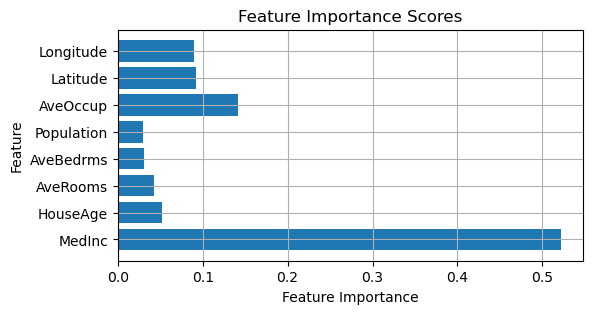

In [41]:
importance_features = pd.DataFrame({
    'Feature': feature_names,
    'Importance': model_08.feature_importances_
})
plt.figure(figsize=(6, 3))
plt.grid()
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Scores')
plt.show()

#### **9. Train a Random Forest Classifier with different numbers of trees and compare accuracy**

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Different numbers of trees to try
num_trees = [10, 50, 100, 200]
accuracies = []

# Train Random Forest with different numbers of trees
for n in num_trees:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((n, accuracy))
    print(f'Number of Trees: {n}, Accuracy: {accuracy:.4f}')

# Compare accuracy
print("\nComparison of Accuracies:")
for n, acc in accuracies:
    print(f'Trees: {n}, Accuracy: {acc:.4f}')


Number of Trees: 10, Accuracy: 1.0000
Number of Trees: 50, Accuracy: 1.0000
Number of Trees: 100, Accuracy: 1.0000
Number of Trees: 200, Accuracy: 1.0000

Comparison of Accuracies:
Trees: 10, Accuracy: 1.0000
Trees: 50, Accuracy: 1.0000
Trees: 100, Accuracy: 1.0000
Trees: 200, Accuracy: 1.0000


#### **10. Train an ensemble model using both Bagging and Random Forest and compare accuracy.**

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Bagging classifier
bagging_model = BaggingClassifier(
    estimator =DecisionTreeClassifier(), 
    n_estimators=100, 
    random_state=42
)
bagging_model.fit(X_train, y_train)
bagging_preds = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_preds)

# Train a Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_preds = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_preds)

# Compare accuracy
print(f"Bagging Classifier Accuracy: {bagging_accuracy:.4f}")
print(f"Random Forest Classifier Accuracy: {random_forest_accuracy:.4f}")

Bagging Classifier Accuracy: 1.0000
Random Forest Classifier Accuracy: 1.0000


#### **11. Train a Random Forest Classifier and tune hyperparameters using GridSearchCVL**

In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Test Set Accuracy: 1.0000


#### **12.  Train a Bagging Regressor with different numbers of base estimators and compare performance**

In [28]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
data = load_diabetes()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Different numbers of base estimators to try
num_estimators = [10, 50, 100, 200]
mse_scores = []

# Train Bagging Regressor with different numbers of estimators
for n in num_estimators:
    bagging_model = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=n,
        random_state=42
    )
    bagging_model.fit(X_train, y_train)
    y_pred = bagging_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append((n, mse))
    print(f'Number of Estimators: {n}, Mean Squared Error: {mse:.4f}')

# Compare performance
print("\nComparison of Mean Squared Errors:")
for n, mse in mse_scores:
    print(f'Estimators: {n}, Mean Squared Error: {mse:.4f}')


Number of Estimators: 10, Mean Squared Error: 3237.5265
Number of Estimators: 50, Mean Squared Error: 2987.0074
Number of Estimators: 100, Mean Squared Error: 2908.8062
Number of Estimators: 200, Mean Squared Error: 2854.8817

Comparison of Mean Squared Errors:
Estimators: 10, Mean Squared Error: 3237.5265
Estimators: 50, Mean Squared Error: 2987.0074
Estimators: 100, Mean Squared Error: 2908.8062
Estimators: 200, Mean Squared Error: 2854.8817


#### **13. Train a Random Forest Classifier and analyze misclassified samples**

In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Analyze misclassified samples
misclassified_indices = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true != pred]
print("\nMisclassified Samples:")
for i in misclassified_indices:
    print(f"Index: {i}, True Label: {y_test[i]}, Predicted Label: {y_pred[i]}")


Accuracy: 1.0000
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Misclassified Samples:


#### **14. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier**

In [36]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a single Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)
print(f"Decision Tree Classifier Accuracy: {dt_accuracy:.4f}")

# Train a Bagging Classifier using Decision Trees as base estimators
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    random_state=42
)
bagging_model.fit(X_train, y_train)
bagging_preds = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_preds)
print(f"Bagging Classifier Accuracy: {bagging_accuracy:.4f}")

# Compare performances
if bagging_accuracy > dt_accuracy:
    print("\nThe Bagging Classifier outperforms the single Decision Tree Classifier.")
elif bagging_accuracy < dt_accuracy:
    print("\nThe Decision Tree Classifier outperforms the Bagging Classifier.")
else:
    print("\nBoth classifiers perform equally.")


Decision Tree Classifier Accuracy: 1.0000
Bagging Classifier Accuracy: 1.0000

Both classifiers perform equally.


#### **15. Train a Random Forest Classifier and visualize the confusion matrix**

Accuracy: 1.0000
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


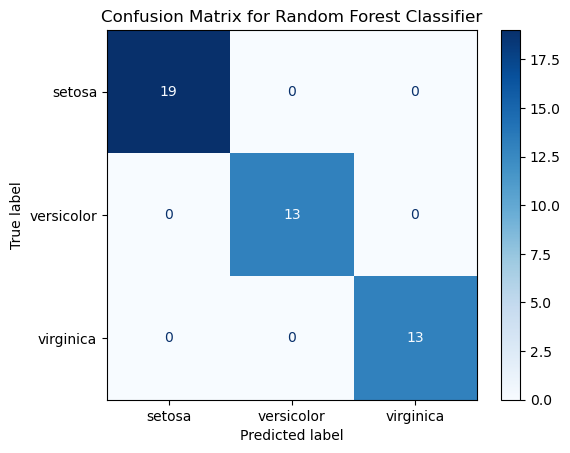

In [38]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()


#### **16. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy**

In [41]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base learners
base_learners = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('logistic', LogisticRegression(random_state=42))
]

# Define the final estimator (meta-learner)
final_estimator = LogisticRegression(random_state=42)

# Train Stacking Classifier
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=final_estimator, cv=3)
stacking_model.fit(X_train, y_train)

# Evaluate the Stacking Classifier
y_pred = stacking_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy:.4f}")


Stacking Classifier Accuracy: 1.0000


#### **17.  Train a Random Forest Classifier and print the top 5 most important features**

In [45]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load dataset
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
# Sort features by importance
top_features = importance_df.sort_values(by='Importance', ascending=False).head(5)

print("Top 5 Most Important Features:")
print(top_features)

Top 5 Most Important Features:
             Feature  Importance
3   petal width (cm)    0.433982
2  petal length (cm)    0.417308
0  sepal length (cm)    0.104105
1   sepal width (cm)    0.044605


#### **18. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score**

In [47]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Bagging Classifier with Decision Tree as base estimator
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    random_state=42
)
bagging_model.fit(X_train, y_train)

# Predict on test set
y_pred = bagging_model.predict(X_test)

# Evaluate performance using Precision, Recall, and F1-score
report = classification_report(y_test, y_pred, target_names=data.target_names)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#### **19. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy**

Max Depth: None, Accuracy: 1.0000
Max Depth: 2, Accuracy: 1.0000
Max Depth: 5, Accuracy: 1.0000
Max Depth: 10, Accuracy: 1.0000
Max Depth: 15, Accuracy: 1.0000
Max Depth: 20, Accuracy: 1.0000


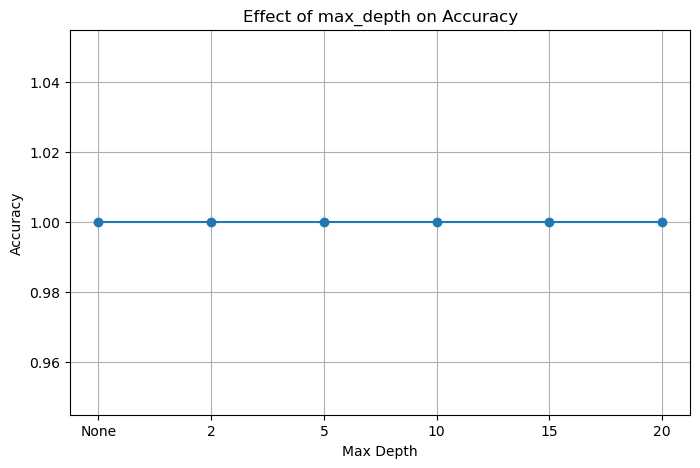

In [51]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Different max_depth values to test
max_depth_values = [None, 2, 5, 10, 15, 20]
accuracies = []

# Train Random Forest Classifier with different max_depth values
for depth in max_depth_values:
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Max Depth: {depth}, Accuracy: {accuracy:.4f}")

# Plot the effect of max_depth on accuracy
plt.figure(figsize=(8, 5))
plt.plot([str(d) for d in max_depth_values], accuracies, marker='o')
plt.title('Effect of max_depth on Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


#### **20. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance**

In [55]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
data = load_diabetes()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base estimators
base_estimators = {
    'DecisionTree': DecisionTreeRegressor(),
    'KNeighbors': KNeighborsRegressor()
}

# Train Bagging Regressor with different base estimators and compare performance
results = {}
for name, estimator in base_estimators.items():
    bagging_model = BaggingRegressor(estimator=estimator, n_estimators=50, random_state=42)
    bagging_model.fit(X_train, y_train)
    y_pred = bagging_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse
    print(f"Base Estimator: {name}, Mean Squared Error: {mse:.4f}")

# Compare results
print("\nPerformance Comparison:")
for name, mse in results.items():
    print(f"{name} Regressor: Mean Squared Error = {mse:.4f}")


Base Estimator: DecisionTree, Mean Squared Error: 2987.0074
Base Estimator: KNeighbors, Mean Squared Error: 3140.1861

Performance Comparison:
DecisionTree Regressor: Mean Squared Error = 2987.0074
KNeighbors Regressor: Mean Squared Error = 3140.1861


#### **21. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score**

ROC-AUC Score: 1.0000


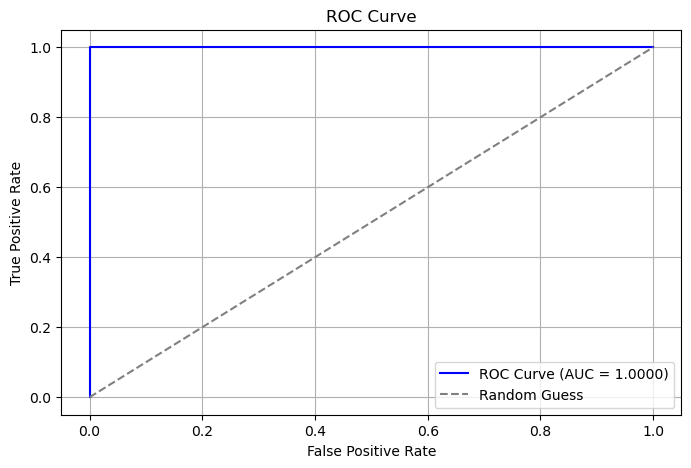

In [57]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Convert multi-class to binary classification for ROC-AUC example
y_binary = (y == 2).astype(int)  # Classify class '2' vs. rest

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict probabilities
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Optional: Plot ROC Curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


#### **22.  Train a Bagging Classifier and evaluate its performance using cross-validatio**

In [61]:
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Define Bagging Classifier with Decision Tree as base estimator
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(), 
    n_estimators=50, 
    random_state=42
)

# Perform cross-validation
cv_scores = cross_val_score(bagging_model, X, y, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")


Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean Accuracy: 0.9667
Standard Deviation: 0.0211


#### **23.  Train a Random Forest Classifier and plot the Precision-Recall curv**

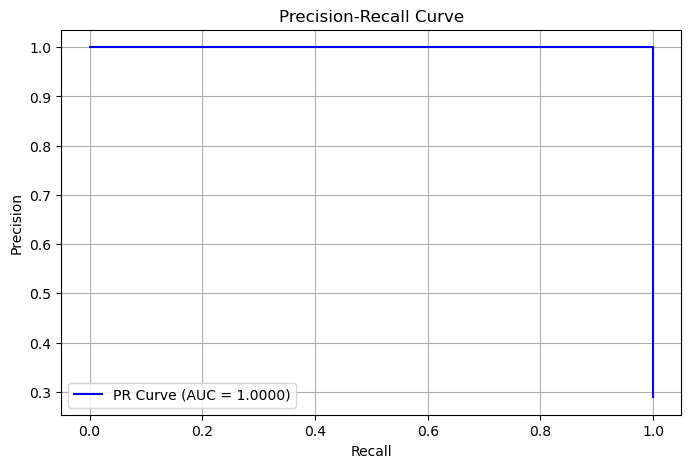

In [63]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Convert multi-class to binary classification for Precision-Recall curve
y_binary = (y == 2).astype(int)  # Classify class '2' vs. rest

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict probabilities
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute Precision and Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.4f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


#### **24. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy**

In [66]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base learners
base_learners = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('logistic', LogisticRegression(max_iter=1000, random_state=42))
]

# Define the final estimator (meta-learner)
meta_learner = LogisticRegression(max_iter=1000, random_state=42)

# Train the Stacking Classifier
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=3)
stacking_model.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred = stacking_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy:.4f}")


Stacking Classifier Accuracy: 1.0000


#### **25. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.**

In [71]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
data = load_diabetes()
X = data.data
y = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Different levels of bootstrap samples
bootstrap_samples = [0.5, 0.7, 1.0]
mse_scores = []

# Train Bagging Regressor with different levels of bootstrap samples
for max_samples in bootstrap_samples:
    bagging_model = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=50,
        max_samples=max_samples,
        random_state=42
    )
    bagging_model.fit(X_train, y_train)
    y_pred = bagging_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append((max_samples, mse))
    print(f"Bootstrap Samples: {max_samples}, Mean Squared Error: {mse:.4f}")

# Compare results
print("\nPerformance Comparison:")
for max_samples, mse in mse_scores:
    print(f"Bootstrap Samples: {max_samples}, Mean Squared Error: {mse:.4f}")


Bootstrap Samples: 0.5, Mean Squared Error: 2826.9423
Bootstrap Samples: 0.7, Mean Squared Error: 2797.2247
Bootstrap Samples: 1.0, Mean Squared Error: 2987.0074

Performance Comparison:
Bootstrap Samples: 0.5, Mean Squared Error: 2826.9423
Bootstrap Samples: 0.7, Mean Squared Error: 2797.2247
Bootstrap Samples: 1.0, Mean Squared Error: 2987.0074
